# PRE-PROCESSING

The dataset is already download in .csv format

# IMPORTING THE PACKAGES

In [48]:
try:
    import numpy as np 
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    from imblearn.over_sampling import SMOTE
    from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
    from sklearn.model_selection import train_test_split
except ModuleNotFoundError:
    !pip install SMOTE

Defaulting to user installation because normal site-packages is not writeable


# LOAD THE DATASET

In [49]:
df = pd.read_csv("phish_predict.csv")

In [50]:
df

,URL,URL_length,privacy_policy,contact_information,feedback_score,load_time,broken_links,new_tech,time_elapsed,content_similarity,...,certificate_authority,SSL_encrption_strength,self_signed_certificate,digital_signature_validity,san_matches_domain,trusted_seal,certification_bey_validity,certification_not_expired,certification_revocation_status,label
0,https://www.google.com/,23,1,1,8.0,1.20,0,1,50,0.90,...,yes,256-bit,no,valid,yes,yes,no,yes,not revoked,0
1,https://www.amazon.com/,24,1,1,11.0,1.50,1,1,90,0.90,...,yes,256-bit,no,valid,yes,yes,no,yes,not revoked,0
2,https://www.microsoft.com/,28,1,1,7.0,1.30,0,1,270,0.93,...,yes,256-bit,no,valid,yes,yes,no,yes,not revoked,0
3,https://www.phishingwebsite.com/,32,0,0,4.0,2.10,5,0,5,0.40,...,no,128-bit,yes,invalid,no,no,yes,no,revoked,1
4,https://www.hackingwebsite.com/,31,0,0,3.0,2.00,7,0,6,0.35,...,no,128-bit,yes,invalid,no,no,yes,no,revoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,http://checkpointsteep.000webhostapp.com,40,0,0,5.0,0.39,6,0,5,0.24,...,no,128-bit,yes,invalid,no,no,yes,no,revoked,1
498,http://tytanworks.com,21,0,0,4.0,1.17,9,0,2,0.21,...,no,128-bit,yes,invalid,no,no,yes,no,revoked,1
499,http://castlemedicolegal.com,28,0,0,3.0,2.00,7,0,1,0.10,...,no,128-bit,yes,invalid,no,no,yes,no,revoked,1
500,http://chrissalamone.com,24,0,0,1.0,4.00,8,0,3,0.32,...,no,128-bit,yes,invalid,no,no,yes,no,revoked,1


# FAMILIARIZING WITH DATA

In [51]:
df.shape

(502, 23)

In [52]:
df.columns

Index(['URL', 'URL_length', 'privacy_policy', 'contact_information',
       'feedback_score', 'load_time', 'broken_links', 'new_tech',
       'time_elapsed', 'content_similarity', 'update_size', 'update_frequency',
       'number_of_changes', 'certificate_authority', 'SSL_encrption_strength',
       'self_signed_certificate', 'digital_signature_validity',
       'san_matches_domain', 'trusted_seal', 'certification_bey_validity',
       'certification_not_expired', 'certification_revocation_status',
       'label'],
      dtype='object')

In [53]:
df.info

<bound method DataFrame.info of                                           URL  URL_length  privacy_policy  \
0                     https://www.google.com/          23               1   
1                     https://www.amazon.com/          24               1   
2                  https://www.microsoft.com/          28               1   
3            https://www.phishingwebsite.com/          32               0   
4             https://www.hackingwebsite.com/          31               0   
..                                        ...         ...             ...   
497  http://checkpointsteep.000webhostapp.com          40               0   
498                     http://tytanworks.com          21               0   
499              http://castlemedicolegal.com          28               0   
500                  http://chrissalamone.com          24               0   
501               http://vivastreetaccount.eu          27               0   

     contact_information  feedback_score  l

# VISUALIZING THE DATA

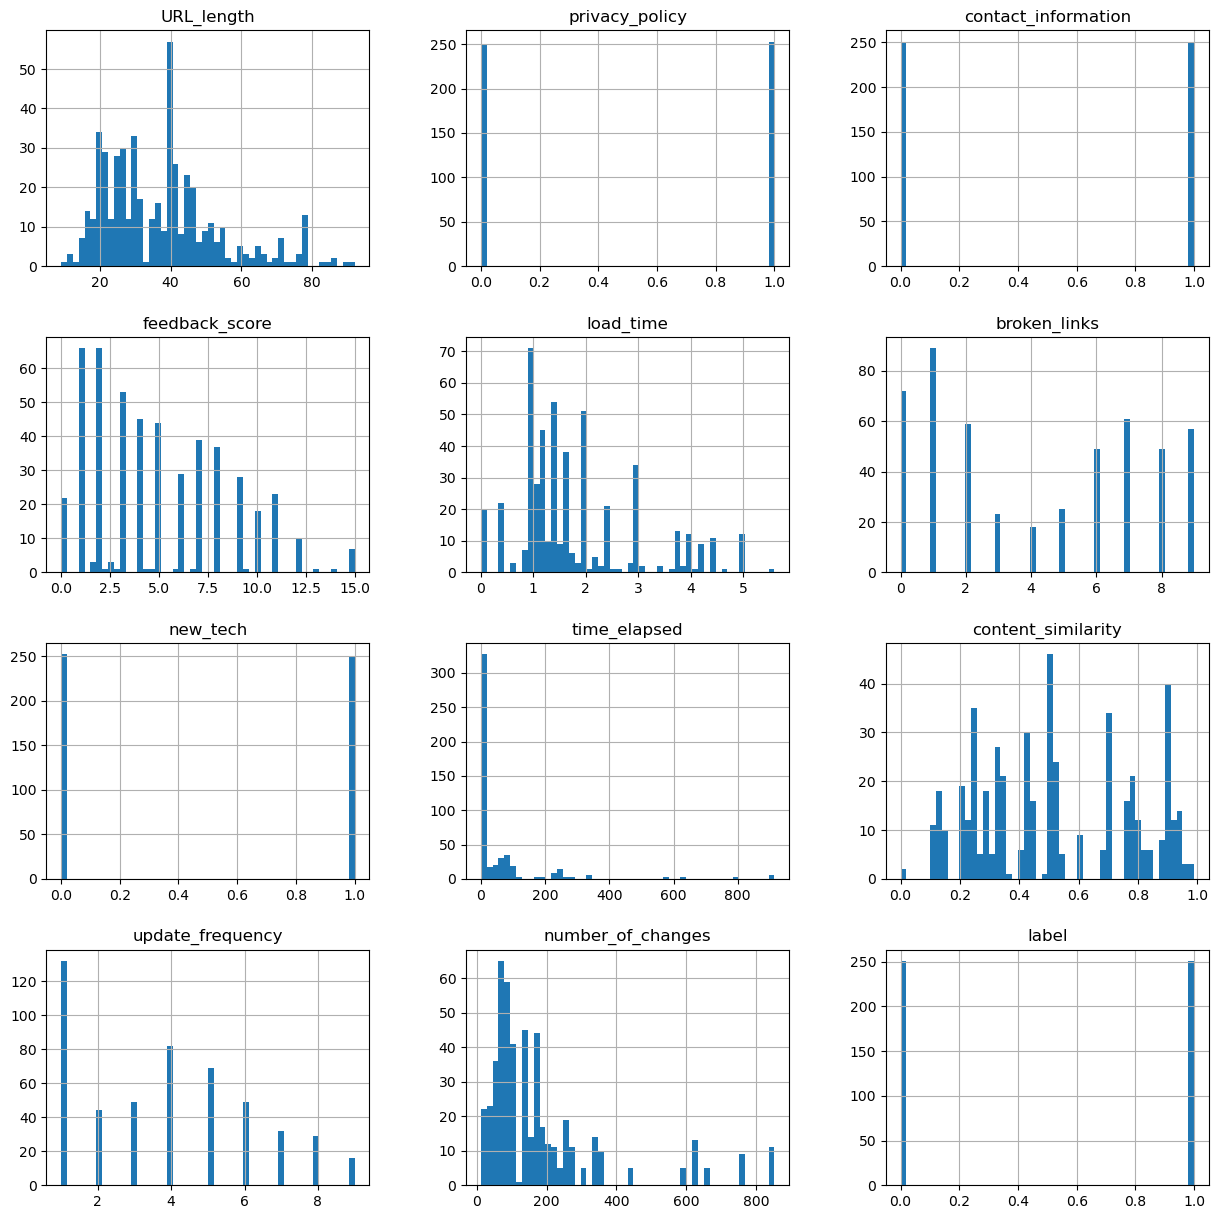

In [54]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (15,15))
plt.show()

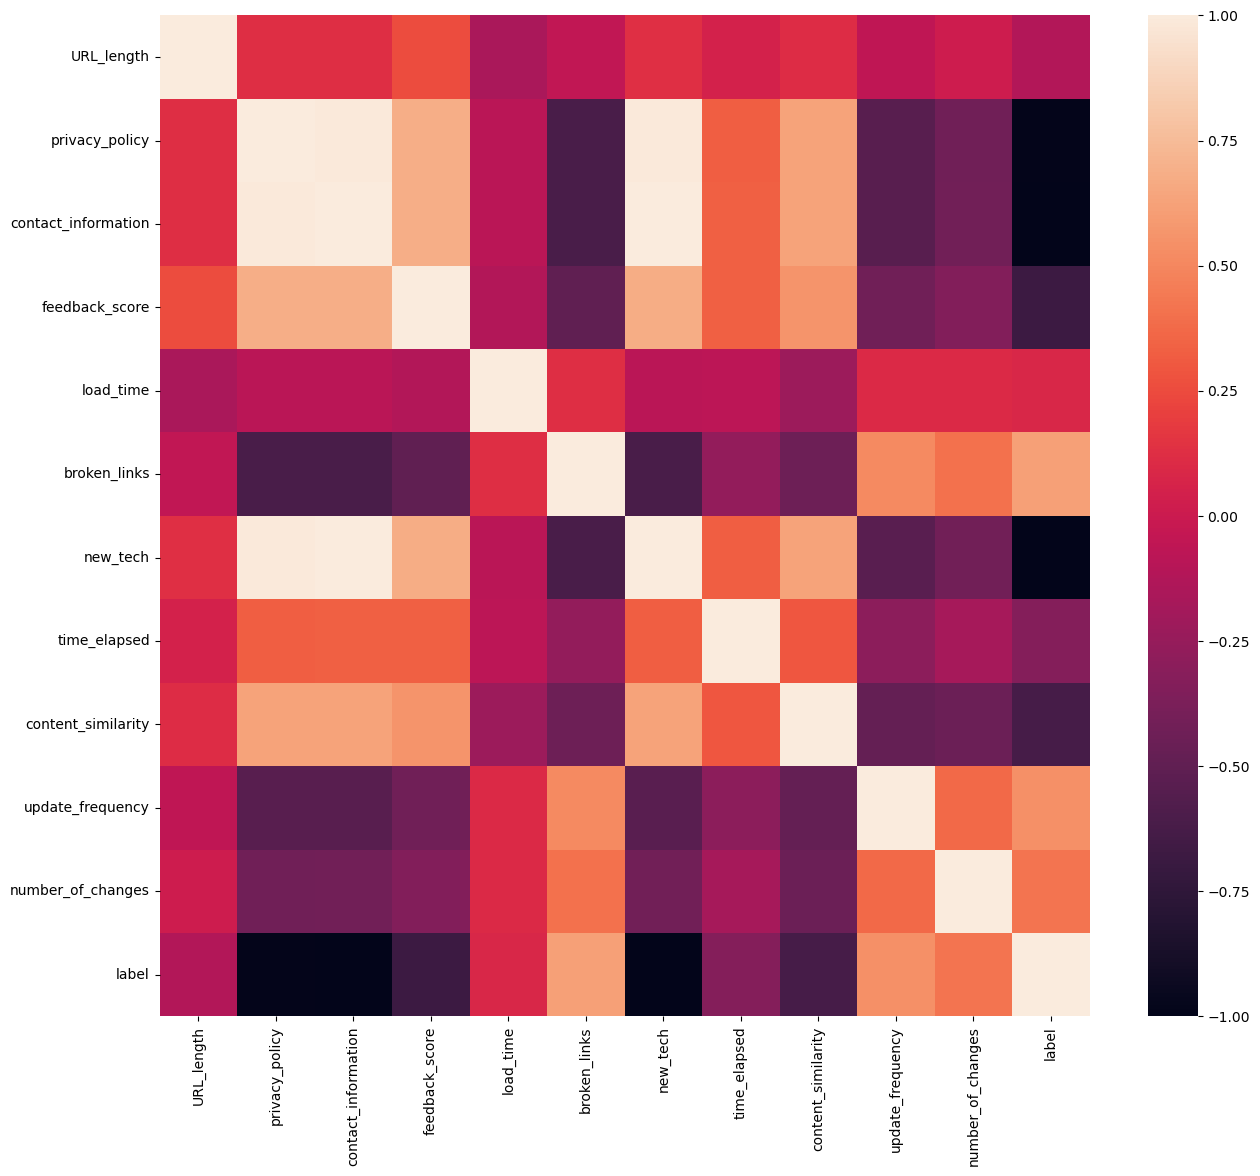

In [55]:
#Correlation heatmap
plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

# TREATING NULL VALUES

In [56]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorical_features = df.select_dtypes(include = [np.object]).columns

C:\Users\santhosh\AppData\Local\Temp\ipykernel_34332\3796453440.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include = [np.object]).columns


In [57]:
numerical_features

Index(['URL_length', 'privacy_policy', 'contact_information', 'feedback_score',
       'load_time', 'broken_links', 'new_tech', 'time_elapsed',
       'content_similarity', 'update_frequency', 'number_of_changes', 'label'],
      dtype='object')

In [58]:
categorical_features

Index(['URL', 'update_size', 'certificate_authority', 'SSL_encrption_strength',
       'self_signed_certificate', 'digital_signature_validity',
       'san_matches_domain', 'trusted_seal', 'certification_bey_validity',
       'certification_not_expired', 'certification_revocation_status'],
      dtype='object')

In [59]:
#checking the null values now
df.isnull().sum()

URL                                0
URL_length                         0
privacy_policy                     0
contact_information                0
feedback_score                     0
load_time                          0
broken_links                       0
new_tech                           0
time_elapsed                       0
content_similarity                 0
update_size                        0
update_frequency                   0
number_of_changes                  0
certificate_authority              0
SSL_encrption_strength             0
self_signed_certificate            0
digital_signature_validity         0
san_matches_domain                 0
trusted_seal                       0
certification_bey_validity         0
certification_not_expired          0
certification_revocation_status    0
label                              0
dtype: int64

<AxesSubplot:>

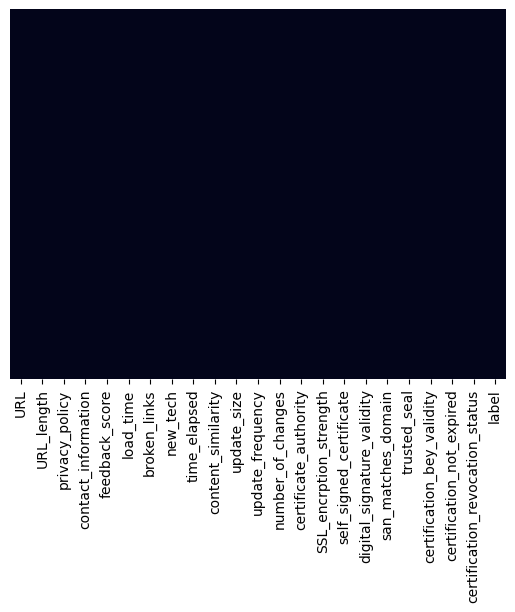

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# HANDLING CATEGORICAL VALUES

In [61]:
df.describe()

,URL_length,privacy_policy,contact_information,feedback_score,load_time,broken_links,new_tech,time_elapsed,content_similarity,update_frequency,number_of_changes,label
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,37.011952,0.503984,0.500000,4.951952,1.825976,4.181275,0.498008,58.456175,0.518446,3.852590,185.382470,0.500000
std,16.120797,0.500483,0.500499,3.495464,1.164872,3.213775,0.500495,137.710337,0.263029,2.372115,184.303991,0.500499
min,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000
25%,24.000000,0.000000,0.000000,2.000000,1.100000,1.000000,0.000000,3.000000,0.280000,1.000000,79.000000,0.000000
50%,36.000000,1.000000,0.500000,4.000000,1.400000,4.000000,0.000000,5.000000,0.500000,4.000000,132.000000,0.500000
75%,44.750000,1.000000,1.000000,7.750000,2.450000,7.000000,1.000000,61.000000,0.770000,5.750000,198.000000,1.000000
max,92.000000,1.000000,1.000000,15.000000,5.600000,9.000000,1.000000,914.000000,0.990000,9.000000,852.000000,1.000000


In [62]:
df = df.drop(['URL'], axis = 1).copy()

In [63]:
df.select_dtypes(include='object').columns

Index(['update_size', 'certificate_authority', 'SSL_encrption_strength',
       'self_signed_certificate', 'digital_signature_validity',
       'san_matches_domain', 'trusted_seal', 'certification_bey_validity',
       'certification_not_expired', 'certification_revocation_status'],
      dtype='object')

In [64]:
df['update_size'].unique()

array(['no', 'yes'], dtype=object)

In [65]:
df['update_size'].replace({'no':1,'yes':0},inplace=True)

In [66]:
df['certificate_authority'].unique()

array(['yes', 'no'], dtype=object)

In [67]:
df['certificate_authority'].replace({'yes':1,'no':0},inplace=True)

In [68]:
df['SSL_encrption_strength'].unique()

array(['256-bit', '128-bit'], dtype=object)

In [69]:
df['SSL_encrption_strength'].replace({'256-bit':1,'128-bit':0},inplace=True)

In [70]:
df['self_signed_certificate'].unique()

array(['no', 'yes'], dtype=object)

In [71]:
df['self_signed_certificate'].replace({'no':1,'yes':0},inplace=True)

In [72]:
 df['digital_signature_validity'].unique()

array(['valid', 'invalid'], dtype=object)

In [73]:
df['digital_signature_validity'].replace({'valid':1,'invalid':0},inplace=True)

In [74]:
df['san_matches_domain'].unique()

array(['yes', 'no'], dtype=object)

In [75]:
df['san_matches_domain'].replace({'yes':1,'no':0},inplace=True)

In [76]:
df['trusted_seal'].unique()

array(['yes', 'no'], dtype=object)

In [77]:
df['trusted_seal'].replace({'yes':1,'no':0},inplace=True)

In [78]:
df['certification_bey_validity'].unique()

array(['no', 'yes'], dtype=object)

In [79]:
df['certification_bey_validity'].replace({'no':1,'yes':0},inplace=True)

In [80]:
df['certification_not_expired'].unique()

array(['yes', 'no'], dtype=object)

In [81]:
df['certification_not_expired'].replace({'yes':1,'no':0},inplace=True)

In [82]:
df['certification_revocation_status'].unique()

array(['not revoked', 'revoked'], dtype=object)

In [83]:
df['certification_revocation_status'].replace({'not revoked':1,'revoked':0},inplace=True)

In [84]:
df['load_time']=df['load_time'].astype("int64")
df['content_similarity']=df['content_similarity'].astype("int64")

In [85]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,URL_length,privacy_policy,contact_information,feedback_score,load_time,broken_links,new_tech,time_elapsed,content_similarity,update_size,...,certificate_authority,SSL_encrption_strength,self_signed_certificate,digital_signature_validity,san_matches_domain,trusted_seal,certification_bey_validity,certification_not_expired,certification_revocation_status,label
0,19,1,1,2.0,3,5,1,46,0,1,...,1,1,1,1,1,1,1,1,1,0
1,31,0,0,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,34,1,1,6.0,1,1,1,2,0,1,...,1,1,1,1,1,1,1,1,1,0
3,23,1,1,8.0,1,1,1,46,0,1,...,1,1,1,1,1,1,1,1,1,0
4,54,0,0,2.0,1,9,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
df

,URL_length,privacy_policy,contact_information,feedback_score,load_time,broken_links,new_tech,time_elapsed,content_similarity,update_size,...,certificate_authority,SSL_encrption_strength,self_signed_certificate,digital_signature_validity,san_matches_domain,trusted_seal,certification_bey_validity,certification_not_expired,certification_revocation_status,label
0,19,1,1,2.0,3,5,1,46,0,1,...,1,1,1,1,1,1,1,1,1,0
1,31,0,0,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,34,1,1,6.0,1,1,1,2,0,1,...,1,1,1,1,1,1,1,1,1,0
3,23,1,1,8.0,1,1,1,46,0,1,...,1,1,1,1,1,1,1,1,1,0
4,54,0,0,2.0,1,9,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,22,0,0,4.0,1,2,0,5,0,0,...,0,0,0,0,0,0,0,0,0,1
498,46,1,1,6.0,1,1,1,91,0,1,...,1,1,1,1,1,1,1,1,1,0
499,17,1,1,2.0,1,9,1,61,0,1,...,1,1,1,1,1,1,1,1,1,0
500,25,1,1,2.0,2,2,1,4,0,1,...,1,1,1,1,1,1,1,1,1,0


In [90]:
df.to_csv("C:\\Users\\santhosh\\OneDrive\\Documents\\Phishing Detection Project\\final_data.csv")

# FINDING OUTLIERS

In [47]:
# Select the columns with the features of interest
features = ['URL_length', 'privacy_policy', 'contact_information', 'feedback_score',
            'load_time', 'broken_links', 'new_tech', 'time_elapsed',
            'content_similarity', 'update_size', 'update_frequency',
            'number_of_changes', 'certificate_authority', 'SSL_encrption_strength',
            'self_signed_certificate', 'digital_signature_validity',
            'san_matches_domain', 'trusted_seal', 'certification_bey_validity',
            'certification_not_expired', 'certification_revocation_status']

# Calculate the Z-score for each feature
z_scores = np.abs((df[features] - df[features].mean()) / df[features].std())

# Set a threshold for the Z-score
threshold = 3

# Identify the outliers for each feature
outliers = {}
for feature in features:
    outliers[feature] = df[z_scores[feature] > threshold][feature].values

# Print the outliers for each feature
for feature, values in outliers.items():
    print(f'Outliers for {feature}: {values}')

Outliers for URL_length: [86 92 89 86]
Outliers for privacy_policy: []
Outliers for contact_information: []
Outliers for feedback_score: []
Outliers for load_time: []
Outliers for broken_links: []
Outliers for new_tech: []
Outliers for time_elapsed: [798 624 624 914 914 914 579 914 914 579 798 914 624]
Outliers for content_similarity: []
Outliers for update_size: []
Outliers for update_frequency: []
Outliers for number_of_changes: [845 756 845 756 756 756 756 852 845 852 756 845 845 845 852 852 756 756
 852 756]
Outliers for certificate_authority: []
Outliers for SSL_encrption_strength: []
Outliers for self_signed_certificate: []
Outliers for digital_signature_validity: []
Outliers for san_matches_domain: []
Outliers for trusted_seal: []
Outliers for certification_bey_validity: []
Outliers for certification_not_expired: []
Outliers for certification_revocation_status: []


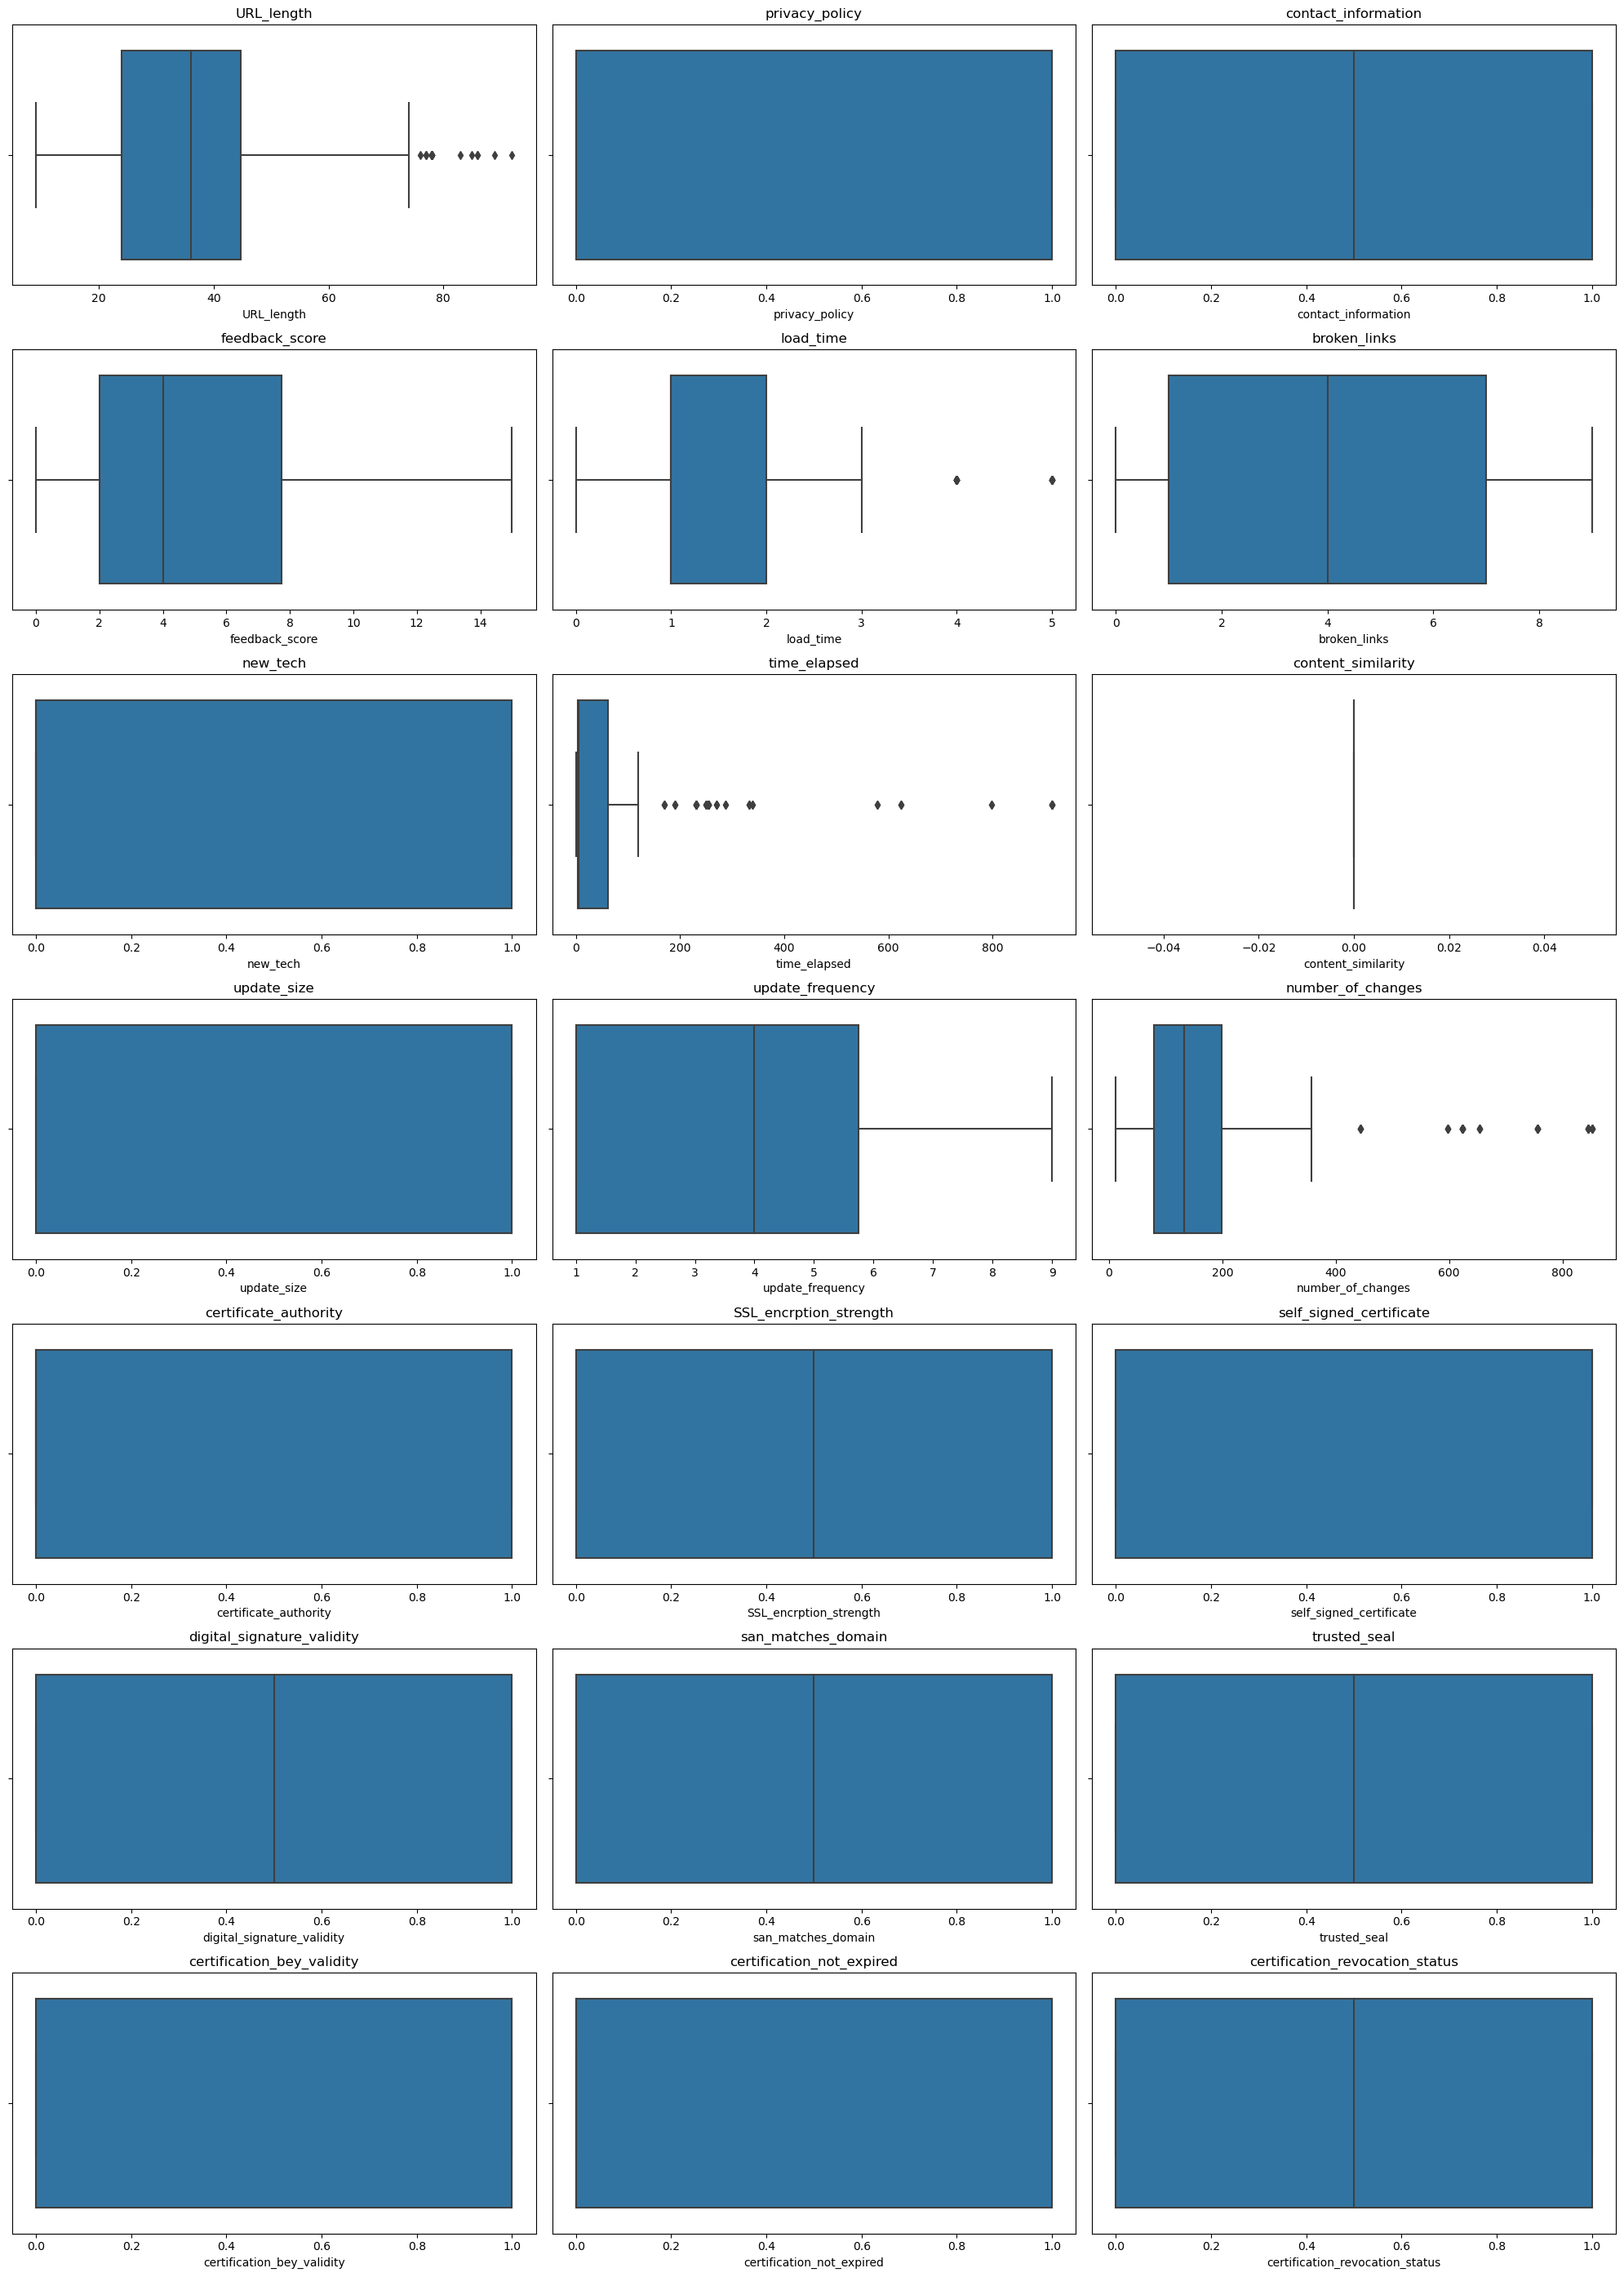

In [664]:
import seaborn as sns
import math

# Select the columns with the features of interest
features = ['URL_length', 'privacy_policy', 'contact_information', 'feedback_score',
            'load_time', 'broken_links', 'new_tech', 'time_elapsed',
            'content_similarity', 'update_size', 'update_frequency',
            'number_of_changes', 'certificate_authority', 'SSL_encrption_strength',
            'self_signed_certificate', 'digital_signature_validity',
            'san_matches_domain', 'trusted_seal', 'certification_bey_validity',
            'certification_not_expired', 'certification_revocation_status']

# Calculate the number of rows and columns needed to show all the plots
n_features = len(features)
n_cols = 3  # adjust as needed
n_rows = math.ceil(n_features / n_cols)

# Create subplots to visualize the outliers
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows*4))

# Flatten the array of axes so that we can iterate through them
axs = axs.flatten()

# Loop through each feature and create a boxplot
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axs[i])
    axs[i].set_title(feature)

# Hide any unused subplots
for i in range(n_features, n_rows*n_cols):
    axs[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [665]:
import pandas as pd

def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df

# Example usage
columns = ['URL_length', 'privacy_policy', 'contact_information', 'feedback_score',
           'load_time', 'broken_links', 'new_tech', 'time_elapsed',
           'content_similarity', 'update_size', 'update_frequency',
           'number_of_changes', 'certificate_authority', 'SSL_encrption_strength',
           'self_signed_certificate', 'digital_signature_validity',
           'san_matches_domain', 'trusted_seal', 'certification_bey_validity',
           'certification_not_expired', 'certification_revocation_status']
df = remove_outliers_iqr(df, columns)
df

,URL_length,privacy_policy,contact_information,feedback_score,load_time,broken_links,new_tech,time_elapsed,content_similarity,update_size,...,certificate_authority,SSL_encrption_strength,self_signed_certificate,digital_signature_validity,san_matches_domain,trusted_seal,certification_bey_validity,certification_not_expired,certification_revocation_status,label
0,18,1,1,3.0,2,1,1,79,0,1,...,1,1,1,1,1,1,1,1,1,0
1,72,1,1,10.0,1,1,1,2,0,1,...,1,1,1,1,1,1,1,1,1,0
2,20,1,1,3.0,1,1,1,2,0,1,...,1,1,1,1,1,1,1,1,1,0
4,40,0,0,6.0,1,7,0,16,0,0,...,0,0,0,0,0,0,0,0,0,1
5,64,1,1,9.0,1,0,1,4,0,1,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,39,0,0,1.0,3,4,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
494,21,0,0,4.0,1,6,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
498,17,1,1,2.0,2,8,1,2,0,1,...,1,1,1,1,1,1,1,1,1,0
500,59,1,1,8.0,1,1,1,3,0,1,...,1,1,1,1,1,1,1,1,1,0


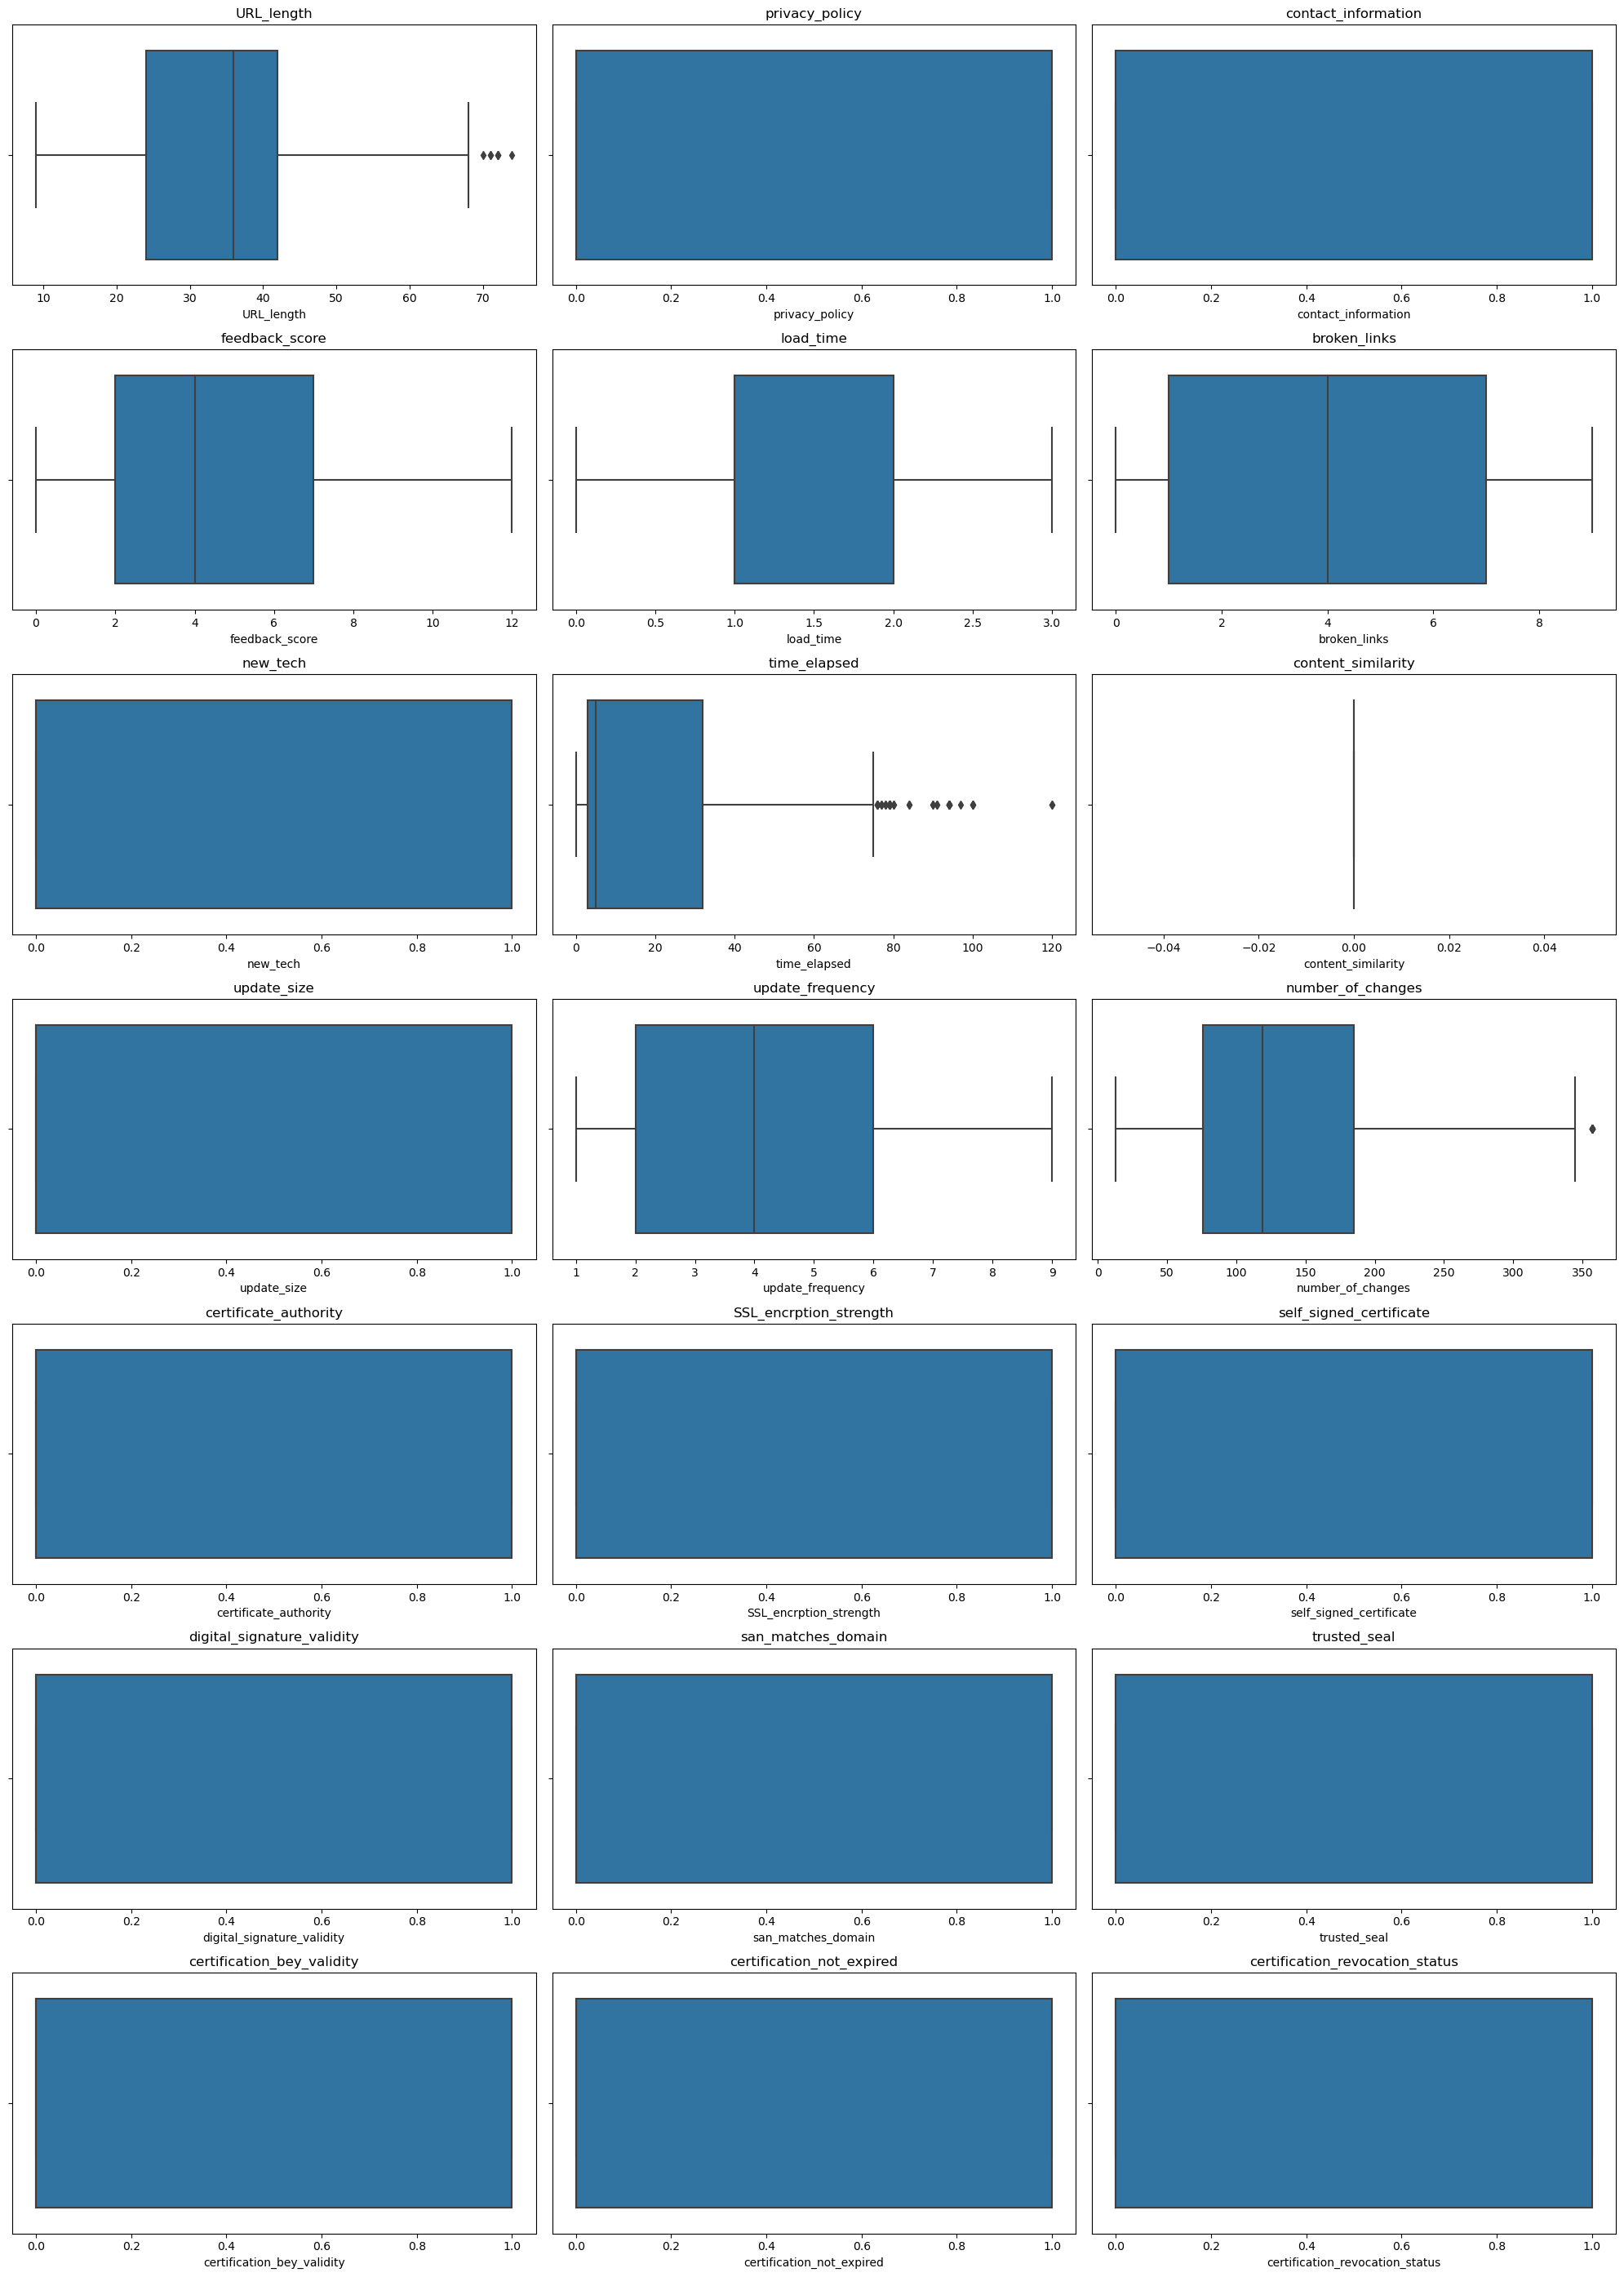

In [666]:
import seaborn as sns
import math

# Select the columns with the features of interest
features = ['URL_length', 'privacy_policy', 'contact_information', 'feedback_score',
            'load_time', 'broken_links', 'new_tech', 'time_elapsed',
            'content_similarity', 'update_size', 'update_frequency',
            'number_of_changes', 'certificate_authority', 'SSL_encrption_strength',
            'self_signed_certificate', 'digital_signature_validity',
            'san_matches_domain', 'trusted_seal', 'certification_bey_validity',
            'certification_not_expired', 'certification_revocation_status']

# Calculate the number of rows and columns needed to show all the plots
n_features = len(features)
n_cols = 3  # adjust as needed
n_rows = math.ceil(n_features / n_cols)

# Create subplots to visualize the outliers
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows*4))

# Flatten the array of axes so that we can iterate through them
axs = axs.flatten()

# Loop through each feature and create a boxplot
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axs[i])
    axs[i].set_title(feature)

# Hide any unused subplots
for i in range(n_features, n_rows*n_cols):
    axs[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [667]:
import pandas as pd

def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    return df

# Example usage
columns = ['URL_length', 'time_elapsed',
           'number_of_changes',]
df = remove_outliers_iqr(df, columns)
df

,URL_length,privacy_policy,contact_information,feedback_score,load_time,broken_links,new_tech,time_elapsed,content_similarity,update_size,...,certificate_authority,SSL_encrption_strength,self_signed_certificate,digital_signature_validity,san_matches_domain,trusted_seal,certification_bey_validity,certification_not_expired,certification_revocation_status,label
2,20,1,1,3.0,1,1,1,2,0,1,...,1,1,1,1,1,1,1,1,1,0
4,40,0,0,6.0,1,7,0,16,0,0,...,0,0,0,0,0,0,0,0,0,1
5,64,1,1,9.0,1,0,1,4,0,1,...,1,1,1,1,1,1,1,1,1,0
6,44,0,0,2.0,1,2,0,6,0,0,...,0,0,0,0,0,0,0,0,0,1
9,40,0,0,3.0,2,9,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,30,1,1,7.0,1,5,1,68,0,1,...,1,1,1,1,1,1,1,1,1,0
492,39,0,0,1.0,3,4,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
494,21,0,0,4.0,1,6,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
498,17,1,1,2.0,2,8,1,2,0,1,...,1,1,1,1,1,1,1,1,1,0


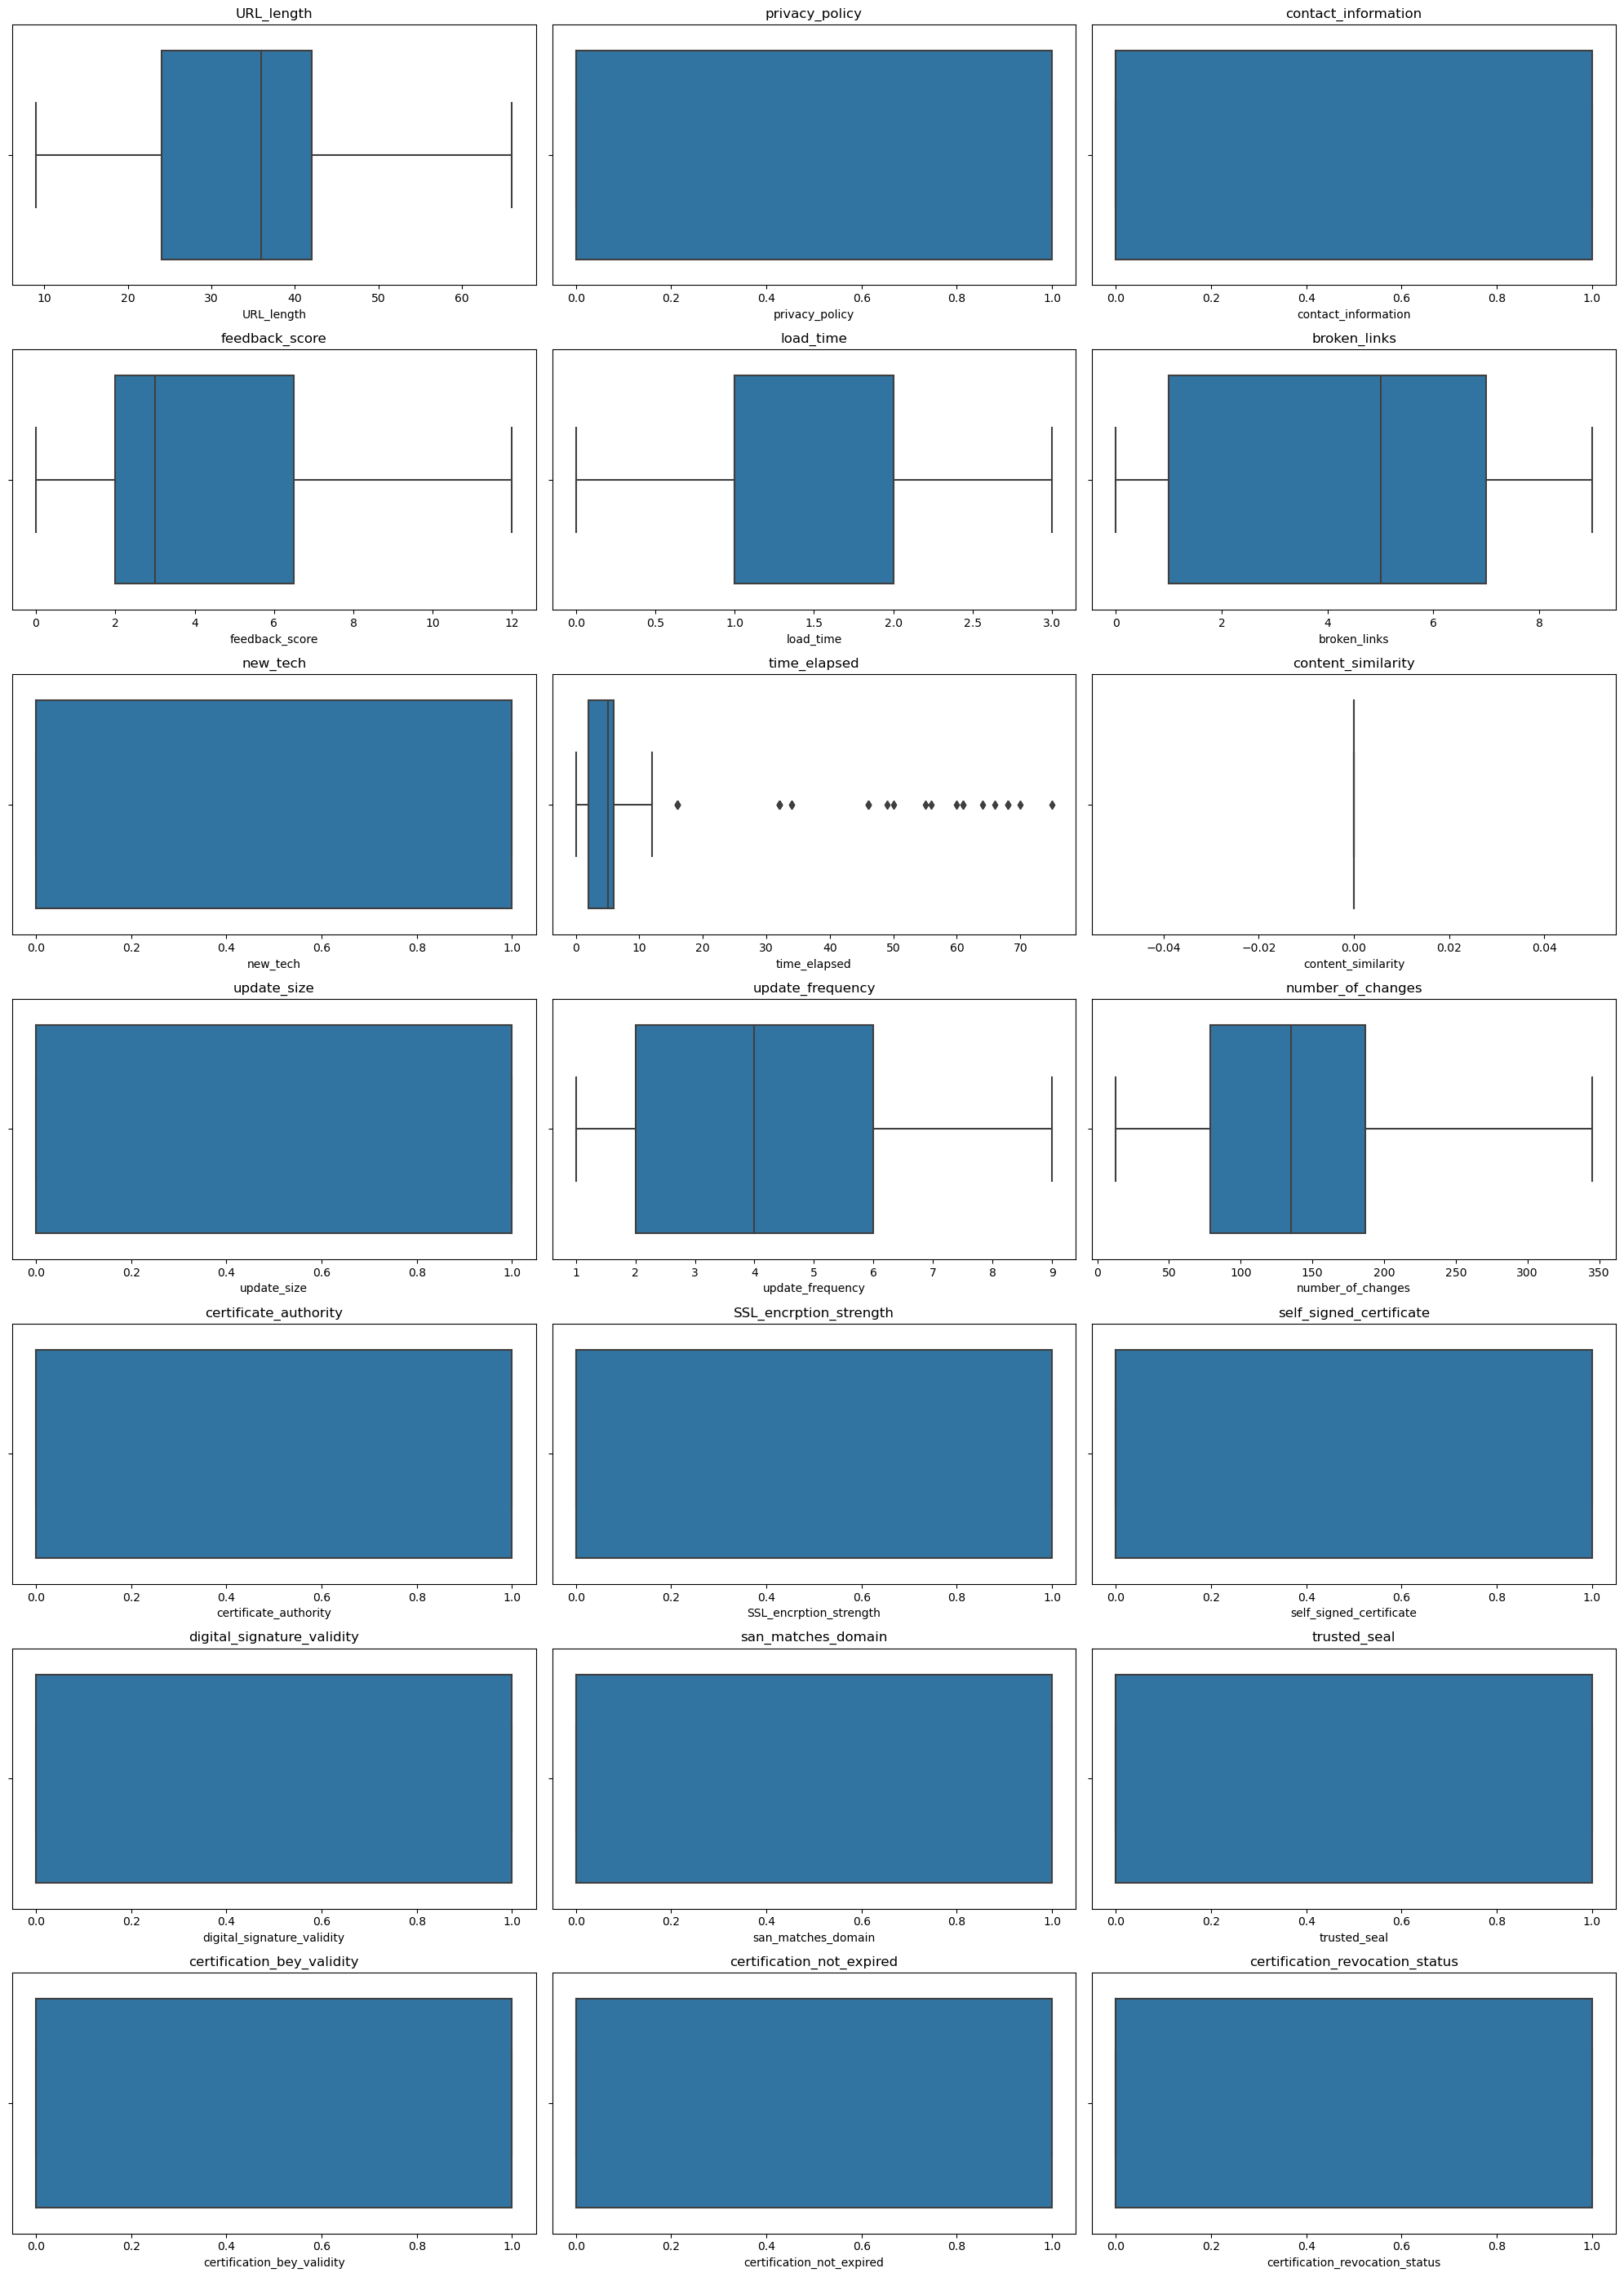

In [668]:
import seaborn as sns
import math

# Select the columns with the features of interest
features = ['URL_length', 'privacy_policy', 'contact_information', 'feedback_score',
            'load_time', 'broken_links', 'new_tech', 'time_elapsed',
            'content_similarity', 'update_size', 'update_frequency',
            'number_of_changes', 'certificate_authority', 'SSL_encrption_strength',
            'self_signed_certificate', 'digital_signature_validity',
            'san_matches_domain', 'trusted_seal', 'certification_bey_validity',
            'certification_not_expired', 'certification_revocation_status']

# Calculate the number of rows and columns needed to show all the plots
n_features = len(features)
n_cols = 3  # adjust as needed
n_rows = math.ceil(n_features / n_cols)

# Create subplots to visualize the outliers
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows*4))

# Flatten the array of axes so that we can iterate through them
axs = axs.flatten()

# Loop through each feature and create a boxplot
for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axs[i])
    axs[i].set_title(feature)

# Hide any unused subplots
for i in range(n_features, n_rows*n_cols):
    axs[i].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# SPLITTING THE DATA

In [686]:
Y = df['label']
X = df.drop('label',axis=1)
X.shape, Y.shape

((291, 21), (291,))

In [687]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [688]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(203, 21)
(203,)
(88, 21)
(88,)


In [689]:
import statsmodels.api as sm

train_Y=np.array(Y_train)
olsreg=sm.OLS(train_Y,X_train)
olsreg=olsreg.fit()
print(olsreg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                              241.3
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                   5.10e-106
Time:                        13:23:47   Log-Likelihood:                          39.837
No. Observations:                 203   AIC:                                     -57.67
Df Residuals:                     192   BIC:                                     -21.23
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

# MACHINE LEARNING MODELS

# XGBOOST CLASSIFIER

In [517]:
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score

In [518]:
def xgboost(X_train, X_test, Y_train, Y_test):
    xg = GradientBoostingClassifier()
    scores = cross_val_score(xg, X_train, Y_train, cv=10) # 10-fold cross-validation
    print("Cross-validation scores:", scores)
    print("Average cross-validation score:", scores.mean())
    xg.fit(X_train,Y_train)
    yPred = xg.predict(X_test)
    print("****Gradient BoostingClassifier****") 
    print("Confusion matrix")
    print(confusion_matrix(Y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (Y_test, yPred))
    Y_pred=xg.predict(X_test)
    Y_pred1=xg.predict(X_train)
    print('Testing accuracy: ',accuracy_score(Y_test,Y_pred))
    print('Training accuracy: ',accuracy_score(Y_train,Y_pred1))

In [519]:
xgboost(X_train, X_test, Y_train, Y_test)

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average cross-validation score: 1.0
****Gradient BoostingClassifier****
Confusion matrix
[[ 73   0]
 [  0 102]]
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       1.00      1.00      1.00       102

    accuracy                           1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175

Testing accuracy:  1.0
Training accuracy:  1.0


# KNN CLASSIFIER

In [520]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score

In [521]:
def kneighborsClassifier(X_train, X_test, Y_train, Y_test):
    knn = KNeighborsClassifier() 
    scores = cross_val_score(knn, X_train, Y_train, cv=10) # 10-fold cross-validation
    print("Cross-validation scores:", scores)
    print("Average cross-validation score:", scores.mean())
    knn.fit(X_train,Y_train)
    yPred = knn.predict(X_test)
    print("****KNeighborsClassifier****") 
    print("Confusion matrix")
    print(confusion_matrix(Y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (Y_test, yPred))
    Y_pred=knn.predict(X_test)
    Y_pred1=knn.predict(X_train)
    print('Testing accuracy: ',accuracy_score(Y_test,Y_pred))
    print('Training accuracy: ',accuracy_score(Y_train,Y_pred1))

In [522]:
kneighborsClassifier(X_train, X_test, Y_train, Y_test)

Cross-validation scores: [0.91666667 0.83333333 0.83333333 0.91666667 0.91666667 0.66666667
 0.72727273 1.         0.81818182 1.        ]
Average cross-validation score: 0.8628787878787879
****KNeighborsClassifier****
Confusion matrix
[[52 21]
 [ 9 93]]
Classification report
              precision    recall  f1-score   support

           0       0.85      0.71      0.78        73
           1       0.82      0.91      0.86       102

    accuracy                           0.83       175
   macro avg       0.83      0.81      0.82       175
weighted avg       0.83      0.83      0.83       175

Testing accuracy:  0.8285714285714286
Training accuracy:  0.8879310344827587


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# SVM CLASSIFIER

In [523]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.model_selection import cross_val_score

In [698]:
def SupportVectorMachine(X_train, X_test, Y_train, Y_test):
    dt = SVC() 
    scores = cross_val_score(dt, X_train, Y_train, cv=10) # 10-fold cross-validation
    print("Cross-validation scores:", scores)
    print("Average cross-validation score:", scores.mean())
    dt.fit(X_train,Y_train)
    yPred = dt.predict(X_test)
    print("****SupportVectorMachine****") 
    print("Confusion matrix")
    print(confusion_matrix(Y_test ,yPred) ) 
    print("Classification report")
    print(classification_report (Y_test, yPred))
    Y_pred=dt.predict(X_test)
    Y_pred1=dt.predict(X_train)
    print('Testing accuracy: ',accuracy_score(Y_test,Y_pred))
    print('Training accuracy: ',accuracy_score(Y_train,Y_pred1))

In [699]:
SupportVectorMachine(X_train, X_test, Y_train, Y_test)

Cross-validation scores: [0.80952381 0.85714286 0.85714286 0.95       0.85       1.
 0.85       0.7        0.85       0.7       ]
Average cross-validation score: 0.8423809523809522
****SupportVectorMachine****
Confusion matrix
[[26  7]
 [ 6 49]]
Classification report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.88      0.89      0.88        55

    accuracy                           0.85        88
   macro avg       0.84      0.84      0.84        88
weighted avg       0.85      0.85      0.85        88

Testing accuracy:  0.8522727272727273
Training accuracy:  0.8472906403940886


# Evaluating Performance Of The Model And Saving The Model

In [700]:
from sklearn.model_selection import cross_val_score

In [701]:
# Xgboost Model is selected
xg = GradientBoostingClassifier()

In [703]:
xg.fit(X_train,Y_train)

GradientBoostingClassifier()

In [704]:
yPred = xg.predict(X_test)

In [706]:
f1_score(yPred,Y_test, average='weighted')

1.0

In [707]:
cv = cross_val_score(xg,X,Y,cv=10)

In [708]:
np.mean(cv)

1.0

In [709]:
import pickle
#saviung the model by using pickle function
pickle.dump(xg, open('model.pkl','wb'))

In [711]:
loaded_xg = pickle.load(open('model.pkl','rb'))
loaded_xg.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1],
      dtype=int64)

In [712]:
from IPython.display import FileLink
FileLink('model.pkl')

C:\Users\santhosh\model.pkl